# Pruebas de Normalidad con Python

In [1]:
import numpy as np 
import pylab 
import scipy.stats as ss

In [ ]:
# otra forma de poner la distrib normal, ahora con np

In [2]:
measurements = np.random.normal(size=100) #N(0,1)
#measurements = np.random.normal(loc = 20, scale = 5, size=100) #N(20,5)

### Histograma

(array([ 5., 10., 16., 21., 15.,  9.,  9.,  9.,  3.,  3.]),
 array([-1.74890989, -1.35720034, -0.96549079, -0.57378124, -0.18207169,
         0.20963786,  0.60134741,  0.99305696,  1.38476651,  1.77647606,
         2.16818561]),
 <a list of 10 Patch objects>)

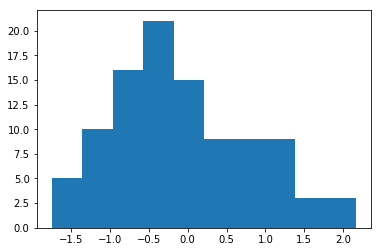

In [4]:
pylab.hist(measurements) #aqui se puede fijar num colum o poner param fijos

### Diagrama de caja o boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd251f41da0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd251f4bb70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd251f4b128>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd251f4bf98>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd251ed6588>],
 'means': []}

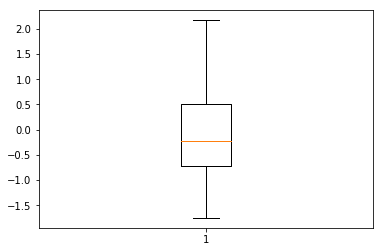

In [5]:
pylab.boxplot(measurements) # tiene pinta de normal

### Q-Q-Plot

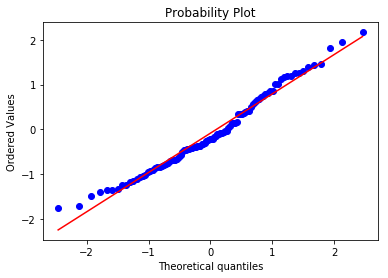

In [6]:
ss.probplot(measurements, dist="norm", plot=pylab) # esto tb vale para testear otras funciones, bernolle, fisher...
pylab.show()

## Contrastes de hipótesis:

Relacionado con la distribución normal, vamos a plantear diversos contrastes de hipótesis para entender la aceptación o rechazo de la H0.
Suponemos:
H0: la distribución es normal.

H1: los datos no siguen una normal.

### Contraste Kolmogorov-Smirnov (de normalidad p-valor)

Queremos saber si la altura de los habitantes de una ciudad sigue una distribución normal. 
Para ello hemos tomado una muestra de 80 alturas.

In [7]:
import pandas as pd
import scipy.stats as ss

df = pd.read_csv("PruebasNorm_datos1.csv")

media, desviacion = ss.norm.fit(df["Altura"]) # aqui ajustas a una normal

print(media) # media = 160,37
print(desviacion) # desviacion = 17,41

160.37437801610426
17.413434203608496


Si lo ajustamos a una normal, parece ser que encajaría con una distribución normal de media 160,37 y desviación típica 17,41.

Hemos hecho un ajuste, pero no sabemos cómo de bueno es realmente. Realizamos Kolmogorov-Smirnov.

In [8]:
d, pvalor = ss.kstest(df["Altura"],"norm",args=(media,desviacion)) # xa hacer test def argumentos
# o alternativamente hace lo mismo
#d, pvalor = ss.ktest(df["Altura"],lambda x: ss.norm.cdf(x,media,desviacion))

In [9]:
d

0.07029940318559086

In [10]:
pvalor

0.8240450968769732

La estadística d es la distancia máxima absoluta entre los CDF (funciones de distribución) de las dos vbles. Cuanto más cercano esté este número a 0, más probable es que las dos muestras se extraigan de la misma distribución.

Hemos obtenido un pvalor grande por lo que podemos aceptar la hipotesis nula y concluir que estos datos sí que se podrían ajustar a una normal. Es decir, no podemos rechazarla, lo que no significa que haya que dar por hecho que es real.

(Importante tener en cuenta que el pvalor no es una probabilidad, es un indicador)

In [ ]:
# ss.proportions_ztest(x, n, p_null, alternative = 'larger') # para proporciones

In [ ]:
# ss.ztest(data, value = 100, alternative = "larger") # para h0 media=100

In [ ]:
# ss.ztest(poblacion1, poblacion2) # para medias de dos poblaciones

### Shapiro-Wilk Test

Suponemos:

H0: la distribución es normal.

H1: los datos no siguen una normal

In [11]:
stat, p = ss.shapiro(measurements)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No hay evidencias para rechazar H0. Por tanto se puede asumir que la distribución es normal')
else:
    print('Hemos encontrado evidencias de que no es normal')

stat=0.977, p=0.083
No hay evidencias para rechazar H0. Por tanto se puede asumir que la distribución es normal


Según este test la vble que hemos construido no sigue una normal, pues p=0.013<0.05

### D’Agostino’s K^2 Test

In [13]:
stat, p = ss.normaltest(measurements)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No hay evidencias para rechazar H0. Por tanto se puede asumir que la distribución es normal')
else:
    print('Hemos encontrado evidencias de que no es normal')

stat=3.764, p=0.152
No hay evidencias para rechazar H0. Por tanto se puede asumir que la distribución es normal


### Anderson-Darling Test

In [14]:
result = ss.anderson(measurements)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian at the %.1f%% level' % (sl))
    else:
        print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=0.704
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably Gaussian at the 5.0% level
Probably Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level
